In [1]:
# import required libraries
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as  plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

In [2]:
# Import seeds dataset
seed_df = pd.read_table('seeds_dataset.txt', sep="\t",on_bad_lines='skip')

# set the column names
seed_df.columns = ["area", "parimeter", "compactness", "length_of_kernal", "width_of_kernal", "asymmetry", 
                "length_of_kernel_groove", "type"]

# check the number of nan values in each column
seed_df.isnull().sum(axis = 0)

# compactness contains one nan value
seed_df['compactness'] = seed_df['compactness'].fillna(0)

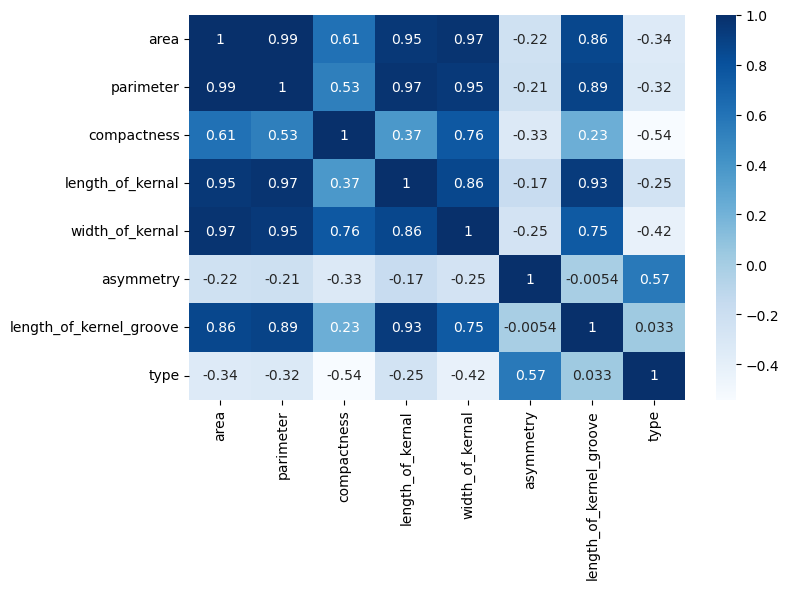

In [3]:
c = seed_df.corr()
plt.subplots(figsize=(8,5))
sns.heatmap(c,annot=True, cmap = "Blues");

In [4]:
# set the input variables
x = seed_df[['area', 'length_of_kernal','width_of_kernal', 'asymmetry', 'length_of_kernel_groove']]

# target value
y = seed_df['type']

# create train, test and split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=.5, random_state=5)

In [5]:
# Create logistic regression log_model and fit X_train and Y_train
log_model = LogisticRegression(C=100, max_iter=10000, multi_class='auto', penalty='l2', solver='liblinear')

log_model.fit(X_train, Y_train)

# predict target value
Y_Pred = log_model.predict(X_test)

# print the accuracy of our log_model
score = log_model.score(X_test, Y_test)
print("accuracy = ", score)

# predict the type with the values for area, length_of_kernal, width_of_kernal, asymmetry, length_of_kernel_groove
predictedType = log_model.predict([[19.3, 6.3, 3.8 , 3.4, 6.2]])

# type of seeds 1 = Kama, 2 = Rosa, 3 = Canadian
print('The predicted type is ', predictedType)

accuracy =  0.9595959595959596
The predicted type is  [2]


Text(0.5, 1.0, 'Logistic Regression Decision Region Boundary')

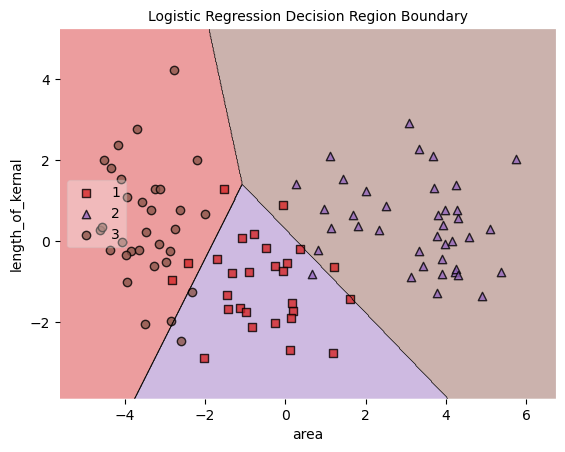

In [6]:
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
log_model.fit(X_train, Y_train)
plot_decision_regions(X_train, Y_train.values, clf=log_model, legend=6,colors='#d62728,#9467bd,#8c564b')

plt.xlabel(x.columns[0], size=10)
plt.ylabel(x.columns[1], size=10)
plt.title('Logistic Regression Decision Region Boundary', size=10)

### Assignment 2

In [7]:
import random

def randomize_dataframe(df, percentage = 0.3):
    """
    Randomizes a percentage of the cells in the given DataFrame.
    
    Args:
    df (pandas.DataFrame): The DataFrame to be randomized.
    percentage (float): The percentage of cells to randomize.
    
    Returns:
    pandas.DataFrame: The randomized DataFrame.
    """
    num_rows, num_cols = df.shape
    num_to_randomize = int(num_rows * num_cols * percentage)  # Calculate the number of cells to randomize
    cells_to_randomize = random.sample(list(df.stack().index), num_to_randomize)  # Select a random subset of cells to randomize
    for cell in cells_to_randomize:
        df.at[cell] = random.random()  # Randomize the cell value
    
    return df


In [8]:
# set the input variables
x = seed_df[['area', 'length_of_kernal','width_of_kernal', 'asymmetry', 'length_of_kernel_groove']]

# target value
y = seed_df['type']

randomized_x = randomize_dataframe(x)
# create train, test and split
X_train, X_test, Y_train, Y_test = train_test_split(randomized_x, y, test_size=.5, random_state=5)

# Create logistic regression log_model and fit X_train and Y_train
log_model = LogisticRegression(C=100, max_iter=10000, multi_class='auto', penalty='l2', solver='liblinear')

log_model.fit(X_train, Y_train)

# predict target value
Y_Pred = log_model.predict(X_test)

# print the accuracy of our log_model
score = log_model.score(X_test, Y_test)
print("accuracy = ", score)

# predict the type with the values for area, length_of_kernal, width_of_kernal, asymmetry, length_of_kernel_groove
predictedType = log_model.predict([[19.3, 6.3, 3.8 , 3.4, 6.2]])

# type of seeds 1 = Kama, 2 = Rosa, 3 = Canadian
print('The predicted type is ', predictedType)

accuracy =  0.43434343434343436
The predicted type is  [2]
